autoencoder.ipynb

A very basic autoencoder in tensorflow to recognize (but not classify) MNIST digits. 
The encoder computes the code  $\textbf{h} = \sigma(\mathbf{W_{e}}\mathbf{x} + \text{b})$, while the decoder computes the reconstruction 
$\textbf{r} = \sigma(\mathbf{W_{d}}\textbf{h} + \text{b})$, 
where $\sigma(x) = \frac{1}{1 + e^{-x}}$. Finally, the loss function (Mean Squared Error) is $L(\textbf{x},\textbf{r}) = \frac{1}{N}\sum_{i=1}^{N}(x^{(i)} - r^{(i)})^2$.

Perhaps interestingly, messing with training_epochs 
and training_batch_size gives insight into how training proceess 
(training_batch_size around 1 not surprisingly yields random noise, ...).

<center><img src="./images/ae_mnist.png" width=900 height=750></center>




David Meyer     <br \>
<dmm@1-4-5.net> <br \>
Tue Aug 23 13:35:00 2016

In [1]:

%matplotlib inline

from   __future__                          import division, print_function, absolute_import 
from   tensorflow.examples.tutorials.mnist import input_data 
from   datetime                            import timedelta 
import tensorflow                          as     tf 
import numpy                               as     np 
import matplotlib.pyplot                   as     plt 
import time 
import math 

/mnt/disk1/dmm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# 
#       global parameters 
# 

DEBUG               = 1                         # more debug 
USE_REGULARIZER     = 1                         # use regularization? 
learning_rate       = 0.01 
test_batch_size     = 256 
display_step        = 1 

In [3]:
# 
#       MNIST parameters 
# 
img_size            = 28                        # images 28 x 28 
img_size_flat       = img_size * img_size       # flattened 
img_shape           = (img_size, img_size)      # shape 
num_channels        = 1                         # 1 is greyscale 

In [4]:
#  
#       Network Parameters 
# 
n_input             = img_size_flat             # input size (img shape: 28*28) 
# 
#       rule of thumb: n_hidden = n_input/3 
# 
#n_hidden            = int(n_input/3)  
n_hidden            = 100                       # testing 
num_classes         = 10                        # not used 

In [5]:
# 
# 
#       get MNIST data set and place holder for feed_dict 
# 
data  = input_data.read_data_sets("/tmp/data/", one_hot=True) 
X     = tf.placeholder("float", [None, n_input]) 
# 
#       one-hot encoded class labels [0-9, one hot encoded] 
# 
data.test.cls = np.argmax(data.test.labels, axis=1) 
# 
#       get the images 
# 
images = data.test.images[0:9] 
# 
#       Get the true classes for those images (again, autoencoder, not 
#       really using these, execpt for checking that we loaded MNIST 
#       correctly (see plot_images below) 
# 
cls_true = data.test.cls[0:9] 

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
# 
#       weights and biases 
# 
#       Note: one hidden layer. This sapproach is cool as it is easily 
#       generalized to many hidden layers. 
# 
# 
weights = { 
    'encoder': tf.Variable(tf.random_normal([n_input, n_hidden])), 
    'decoder': tf.Variable(tf.random_normal([n_hidden, n_input])) 
} 
biases = { 
    'encoder': tf.Variable(tf.random_normal([n_hidden])), 
    'decoder': tf.Variable(tf.random_normal([n_input])), 
} 

In [7]:
# 
#       encoder/decoder 
#        
#       try tf.nn.sigmoid, tf.nn.relu, etc for nonlinearity 
#       nonlinearity=False means transfer function (aka activation funtion) 
#       g(x) = x 
# 
def encoder(x, nonlinearity=False): 
    code = tf.add(tf.matmul(x, weights['encoder']), biases['encoder']) 
    if nonlinearity: 
        code = nonlinearity(code) 
    return code 
 
def decoder(code, nonlinearity=False): 
    reconstruction = tf.add(tf.matmul(code, weights['decoder']), biases['decoder']) 
    if nonlinearity: 
        reconstruction = nonlinearity(reconstruction) 
    return reconstruction 

In [8]:
# 
#       get the encoding and decoding operations 
# 
#       relu seems less efficient here 
# 
# 
#       first encode 
# 
encoder_op = encoder(X,tf.nn.sigmoid)

In [9]:
# 
#       then decode 
# 
decoder_op = decoder(encoder_op,tf.nn.sigmoid) 

In [10]:
# 
#       decoder_op is our predicted value (y_pred) 
# 
y_pred = decoder_op 
# 
#       y_true is the input X  
# 
y_true = X 

In [11]:
# 
# 
#       with regularization 
# 
#       cost = tf.add(tf.reduce_mean(tf.pow(y_true - y_pred, 2)), 
#                     tf.mul(reg_constant,tf.reduce_sum(reg_losses))) 
# 
# Epoch: 0001 cost = 0.455753744 
# Optimization Finished...(training_epochs: 1,training_batch_size: 1, elapsed time: 0:00:00) 
# Epoch: 0001 cost = 0.189976141 
# Optimization Finished...(training_epochs: 1,training_batch_size: 9, elapsed time: 0:00:00) 
# Epoch: 0001 cost = 0.071388490 
# Optimization Finished...(training_epochs: 1,training_batch_size: 90, elapsed time: 0:00:02) 
# Epoch: 0001 cost = 0.028894797 
# Optimization Finished...(training_epochs: 1,training_batch_size: 900, elapsed time: 0:00:30) 
#       w/o regularization 
# 
#       cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) 
# 
# Epoch: 0001 cost = 0.431725562 
# Optimization Finished...(training_epochs: 1,training_batch_size: 1, elapsed time: 0:00:00) 
# Epoch: 0001 cost = 0.190942019 
# Optimization Finished...(training_epochs: 1,training_batch_size: 9, elapsed time: 0:00:00) 
# Epoch: 0001 cost = 0.072323456 
# Optimization Finished...(training_epochs: 1,training_batch_size: 90, elapsed time: 0:00:02) 
# Epoch: 0001 cost = 0.034361549 
# Optimization Finished...(training_epochs: 1,training_batch_size: 900, elapsed time: 0:00:30) 
# 
# 
reg_losses   = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES) 
reg_constant = 0.01  
# 
# 
if (USE_REGULARIZER): 
        reg_losses   = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES) 
        reg_constant = 0.01  
        error = tf.add(tf.reduce_mean(tf.square(tf.sub(y_true,y_pred))), 
                       tf.mul(reg_constant,tf.reduce_sum(reg_losses))) 
else: 
        error = tf.reduce_mean(tf.square(tf.sub(y_true,y_pred))) 

In [12]:
# 
#       use the Adam optimizer 
# 
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(error) 
# 
#       might try others, e.g.,  
# 
#       optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(error) 
# 
# 

In [13]:
# 
# 
#       Get tensorlfow going 
# 
init = tf.initialize_all_variables() 
# 
#       Launch the graph (use InteractiveSession as that is more convenient while using Notebooks) 
# 
session = tf.InteractiveSession() 
session.run(init) 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
# 
#       check that we loaded MNIST correctly 
# 
def plot_images(images, cls_true, cls_pred=None): 
    assert len(images) == len(cls_true) == 9 
    fig, ax = plt.subplots(3, 3) 
    fig.subplots_adjust(hspace=0.3, wspace=0.3) 
    for i, ax in enumerate(ax.flat): 
        ax.imshow(images[i].reshape(img_shape), cmap='binary') 
        if cls_pred is None: 
            xlabel = "Label: {0}".format(cls_true[i]) 
        else: 
            xlabel = "Label: {0}, Pred: {1}".format(cls_true[i], cls_pred[i]) 
        ax.set_xlabel(xlabel) 
        ax.set_xticks([])               # get rid of ticks 
        ax.set_yticks([]) 
    plt.show()    

In [15]:
# 
#       break up into batches and run the optimizer 
# 
def optimize(training_epochs,training_batch_size): 
        start_time = time.time() 
        for epoch in range(training_epochs): 
            for i in range(training_batch_size):   # Loop over all batches 
                batch_xs, _ = data.train.next_batch(training_batch_size) 
                _, c = session.run([optimizer, error], feed_dict={X: batch_xs}) 
            if epoch % display_step == 0: 
                print("Epoch:", '%04d' % (epoch+1), "error =", "{:.9f}".format(c)) 
        end_time = time.time() 
        time_dif = end_time - start_time 
        print('Optimization Finished...training_epochs: {:d},training_batch_size: {:d}, elapsed time: {:s}' 
              .format(training_epochs,training_batch_size,str(timedelta(seconds=int(round(time_dif)))))) 

In [ ]:
# 
# 
#       display_reconstruction 
# 
#       Run the encoder/decoder on the test set, compare originals to reconstruction 
# 
#       Compare original images with their test set reconstructions 
# 
# 
def display_reconstruction(examples_to_show,fontsize): 
        reconstruction = session.run(y_pred, 
                                     feed_dict={X: data.test.images[:examples_to_show]}) 
        fig, ax = plt.subplots(2,10,figsize=(10,3)) 
        plt.style.use('grayscale')                                      # MNIST is depth 1 
        aboutmiddle = int((examples_to_show/2) - 1)                     # sort of 
        ax[0][aboutmiddle].set_title('MNIST',                           # move over then center 
                           horizontalalignment='center', 
                           fontsize=fontsize)   
        ax[1][aboutmiddle].set_title('Reconstruction',                  # move over then center 
                           horizontalalignment='center', 
                           fontsize=fontsize) 
        for i in range(examples_to_show): 
            ax[0][i].set_xticks([])                                     # has to be a better way 
            ax[0][i].set_yticks([])                                     # ... 
            ax[1][i].set_xticks([])                                     # ... 
            ax[1][i].set_yticks([])                                     # still removing ticks 
            ax[0][i].imshow(np.reshape(data.test.images[i],(28, 28))) 
            ax[1][i].imshow(np.reshape(reconstruction[i],  (28, 28))) 
       # fig.show() 
        plt.show()
        plt.draw() 

Epoch: 0001 error = 0.438254684
Epoch: 0002 error = 0.428265542
Epoch: 0003 error = 0.405789196
Epoch: 0004 error = 0.401795357
Epoch: 0005 error = 0.358568311
Epoch: 0006 error = 0.348973870
Epoch: 0007 error = 0.327559888
Epoch: 0008 error = 0.343825132
Epoch: 0009 error = 0.309621274
Epoch: 0010 error = 0.302921414
Optimization Finished...training_epochs: 10,training_batch_size: 1, elapsed time: 0:00:00


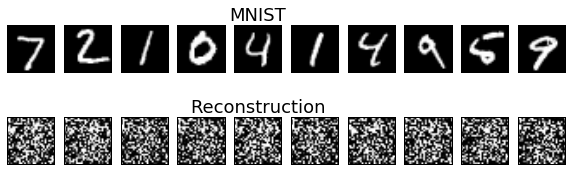

Epoch: 0001 error = 0.220438540
Epoch: 0002 error = 0.157879680
Epoch: 0003 error = 0.134742528
Epoch: 0004 error = 0.110939361
Epoch: 0005 error = 0.105452642
Epoch: 0006 error = 0.100848615
Epoch: 0007 error = 0.078585252
Epoch: 0008 error = 0.079463862
Epoch: 0009 error = 0.089650750
Epoch: 0010 error = 0.071676590
Optimization Finished...training_epochs: 10,training_batch_size: 9, elapsed time: 0:00:00


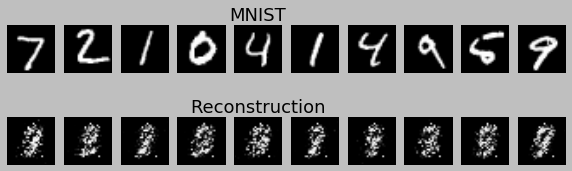

Epoch: 0001 error = 0.072386861
Epoch: 0002 error = 0.064590491
Epoch: 0003 error = 0.055236824
Epoch: 0004 error = 0.050755367


In [ ]:
# 
training_epochs = 10                            # arbitrary 
# 
# 
#       doesn't quite display right, but ... 
# 
for batch_size in [1, 9, 90, 1000]:              # 1+9 = 10, 10+90 = 100, ...= 1000 
        optimize(training_epochs=training_epochs,training_batch_size=batch_size) 
        display_reconstruction(examples_to_show=10,fontsize=18) 